In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
from time import time

In [ ]:
csfont = {'fontname':'Nirmala UI'}

## Function that returns train,validation and test dataloader 

In [ ]:
sc = StandardScaler()
def load_train_dataset():
    train_df = pd.read_csv("/content/drive/My Drive/train_data.csv")
    
    #get the pixels in one variable and the target or label in another variable for classification problem
    X = np.array(train_df.loc[:, train_df.columns != 'Label'].values)/255
#     X = sc.fit_transform(X)
    y = np.array(train_df['Label'].values)

    
    #split the data into train and validation set. 80% for training and rest for validation
    features_train, features_val, targets_train, targets_val = train_test_split(X,y,test_size=0.2)
    X_train = torch.from_numpy(features_train).type(torch.float)
    X_val = torch.from_numpy(features_val).type(torch.float)

    Y_train = torch.from_numpy(targets_train)
    Y_val = torch.from_numpy(targets_val)


    train = torch.utils.data.TensorDataset(X_train,Y_train)
    val = torch.utils.data.TensorDataset(X_val,Y_val)


    train_loader = torch.utils.data.DataLoader(train,shuffle=False,batch_size = 20)
    val_loader = torch.utils.data.DataLoader(val,shuffle=False,batch_size = 20)
       
    
    return train_loader,val_loader
   

def load_test_dataset():

    test_df = pd.read_csv("/content/drive/My Drive/test_data.csv")
    
    X = np.array(test_df.loc[:, test_df.columns != 'Label'].values)/255
#     sc.fit_transform(X)
    y = np.array(test_df['Label'].values)
    
    X = torch.from_numpy(X).type(torch.float)
    y = torch.from_numpy(y)
    test = torch.utils.data.TensorDataset(X,y)
    
    test_loader = torch.utils.data.DataLoader(test,shuffle=False,batch_size = 20)
    
    return test_loader

In [ ]:
train_loader,valid_loader=load_train_dataset()

In [ ]:
test_loader = load_test_dataset()


In [ ]:
len(train_loader)

2448

# Character Mapping Function 

In [ ]:
def map_labels(label):
    charset = {
                0:"Not a Nepali Char",
                1: 'क',
                2: 'ख',
                3: 'ग',
                4: 'घ',
                5: 'ङ',
                6: 'च',
                7: 'छ',
                8: 'ज',
                9: 'झ',
                10: 'ञ',
                11: 'ट',
                12: 'ठ',
                13: 'ड',
                14: 'ढ',
                15: 'ण',
                16: 'त',
                17: 'थ',
                18: 'द',
                19: 'ध',
                20: 'न',
                21: 'प',
                22: 'फ',
                23: 'ब',
                24: 'भ',
                25: 'म',
                26: 'य',
                27: 'र',
                28: 'ल',
                29: 'व',
                30: 'श',
                31: 'ष',
                32: 'स',
                33: 'ह',
                34: 'क्ष,',
                35: 'त्र',
                36: 'ज्ञ',
        
    }
    for key,value in charset.items():
        if label==key:
            return value
    

In [ ]:
charset = {
                0:"Not a Nepali Char",
                1: 'क',
                2: 'ख',
                3: 'ग',
                4: 'घ',
                5: 'ङ',
                6: 'च',
                7: 'छ',
                8: 'ज',
                9: 'झ',
                10: 'ञ',
                11: 'ट',
                12: 'ठ',
                13: 'ड',
                14: 'ढ',
                15: 'ण',
                16: 'त',
                17: 'थ',
                18: 'द',
                19: 'ध',
                20: 'न',
                21: 'प',
                22: 'फ',
                23: 'ब',
                24: 'भ',
                25: 'म',
                26: 'य',
                27: 'र',
                28: 'ल',
                29: 'व',
                30: 'श',
                31: 'ष',
                32: 'स',
                33: 'ह',
                34: 'क्ष,',
                35: 'त्र',
                36: 'ज्ञ',
        
    }

## Visualize the data 

In [ ]:
%matplotlib inline
def data_visualize_before_pred(loader):
    """
    function that visualizes images before and after training.
    
    Arguments:  
    
    loader - data loader for PyTorch (can ne train,test or validation loader)
    """
    dataiter = iter(train_loader)
    images, labels = dataiter.next()
    images = images.numpy()
   
    csfont = {'fontname':'Nirmala UI'}
    # obtain one batch of training images
   

    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(30, 6))
    for ind in range(20):
        ax = fig.add_subplot(2, 20/2, ind+1, xticks=[], yticks=[])
        images = images.reshape(-1,32,32)
        ax.imshow(np.squeeze(images[ind]), cmap='gray')
        a = map_labels(labels[ind])
        ax.set_title(a,**csfont,fontsize=25)
    

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2329 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2334 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 

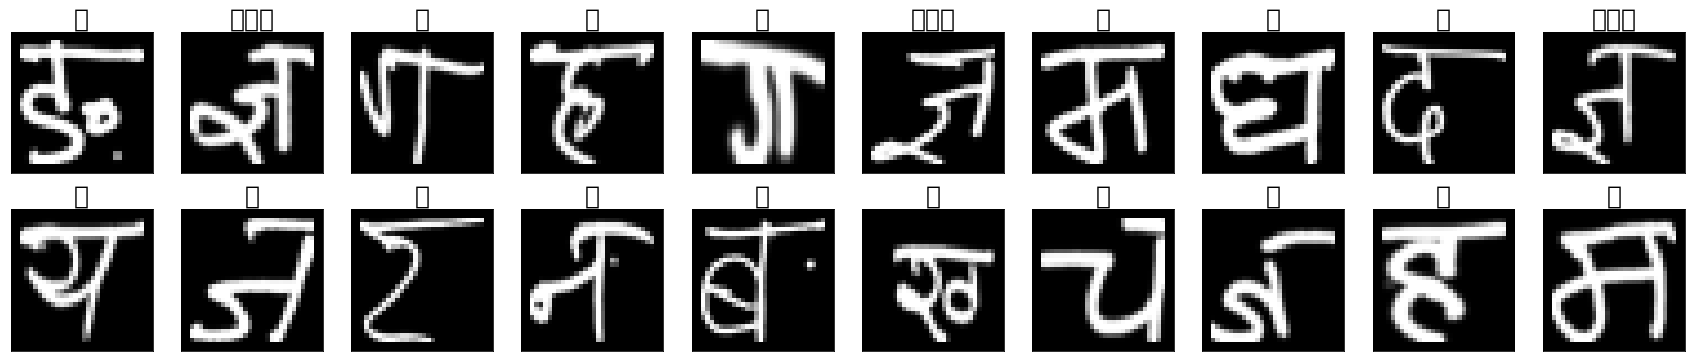

In [ ]:
data_visualize_before_pred(train_loader)

In [ ]:
from torch.nn import Module
from torch import nn

input_size = 1024
hidden_sizes = [256,128,64]
output_size = 37
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim =1)
                     )

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=1024, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=37, bias=True)
  (7): LogSoftmax()
)


In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(test_loader))
images = images.view(images.shape[0],-1)
logps = model(images)
loss = criterion(logps,labels)

print('Before forward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before forward pass: 
 None
After backward pass: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
from torch import optim 

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

print('Initial Weights - ', model[0].weight)

images, labels = next(iter(train_loader))

images = images.view(images.shape[0],-1)

optimizer.zero_grad()

output = model(images)

loss = criterion(output,labels)

loss.backward()

print('Gradient - ', model[0].weight.grad)



Initial Weights -  Parameter containing:
tensor([[ 0.0201,  0.0155,  0.0157,  ..., -0.0127,  0.0130,  0.0111],
        [-0.0098, -0.0133,  0.0179,  ...,  0.0110,  0.0061,  0.0027],
        [ 0.0195,  0.0267,  0.0110,  ..., -0.0279,  0.0244, -0.0139],
        ...,
        [-0.0013, -0.0261, -0.0047,  ...,  0.0120, -0.0081,  0.0112],
        [-0.0244,  0.0260, -0.0085,  ...,  0.0223, -0.0306, -0.0229],
        [-0.0310,  0.0287,  0.0172,  ..., -0.0233, -0.0233, -0.0033]],
       requires_grad=True)
Gradient -  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0201,  0.0155,  0.0157,  ..., -0.0127,  0.0130,  0.0111],
        [-0.0098, -0.0133,  0.0179,  ...,  0.0110,  0.0061,  0.0027],
        [ 0.0195,  0.0267,  0.0110,  ..., -0.0279,  0.0244, -0.0139],
        ...,
        [-0.0013, -0.0261, -0.0047,  ...,  0.0120, -0.0081,  0.0112],
        [-0.0244,  0.0260, -0.0085,  ...,  0.0223, -0.0306, -0.0229],
        [-0.0310,  0.0287,  0.0172,  ..., -0.0233, -0.0233, -0.0033]],
       requires_grad=True)


## Core Training on NN

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
time0 = time()
epochs = 50
for e in range(epochs):
    running_loss = 0 
    for images, labels in train_loader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training Loss: {}".format(e,running_loss/len(train_loader)))

    for images, labels in valid_loader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Validation Loss: {}".format(e,running_loss/len(valid_loader)))
        print('------------------------------------------------------------------------')
print("\n Training time (in Minutes) =", (time() - time0)/60)
        

Epoch 0 - Training Loss: 1.3649120307192693
Epoch 0 - Validation Loss: 6.503341125750464
Epoch 1 - Training Loss: 0.7781008141894453
Epoch 1 - Validation Loss: 3.745753369227149
Epoch 2 - Training Loss: 0.516409766151162
Epoch 2 - Validation Loss: 2.5163518946520447
Epoch 3 - Training Loss: 0.3805141282736573
Epoch 3 - Validation Loss: 1.862429953545478
Epoch 4 - Training Loss: 0.2937263302072073
Epoch 4 - Validation Loss: 1.4417992912832454
Epoch 5 - Training Loss: 0.2319921864717103
Epoch 5 - Validation Loss: 1.1411531024180304
Epoch 6 - Training Loss: 0.18484149649556653
Epoch 6 - Validation Loss: 0.9127357007762161
Epoch 7 - Training Loss: 0.14712423457249732
Epoch 7 - Validation Loss: 0.7297303612919196
Epoch 8 - Training Loss: 0.11810562344775094
Epoch 8 - Validation Loss: 0.5878785803919396
Epoch 9 - Training Loss: 0.09331548605923612
Epoch 9 - Validation Loss: 0.46471955402228476
Epoch 10 - Training Loss: 0.07897066749658324
Epoch 10 - Validation Loss: 0.39815421876342727
Epoch

In [ ]:
def view_classify(img,ps):
    ps = ps.data.numpy().squeeze()
    
    fig, (ax1,ax2) = plt.subplots(figsize=(10,19), ncols = 2)
    ax1.imshow(img.view(1,1,32,32).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(0,37),ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(0,37))
    ax2.set_yticklabels(charset.values(),**csfont,fontsize=20)
    ax2.set_title("Class Probability")
    ax2.set_xlim(0,1.1)
    plt.tight_layout()


The actual Character is प
Predicted Digit = प
The probability of predicted Character is 0.9999981


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s

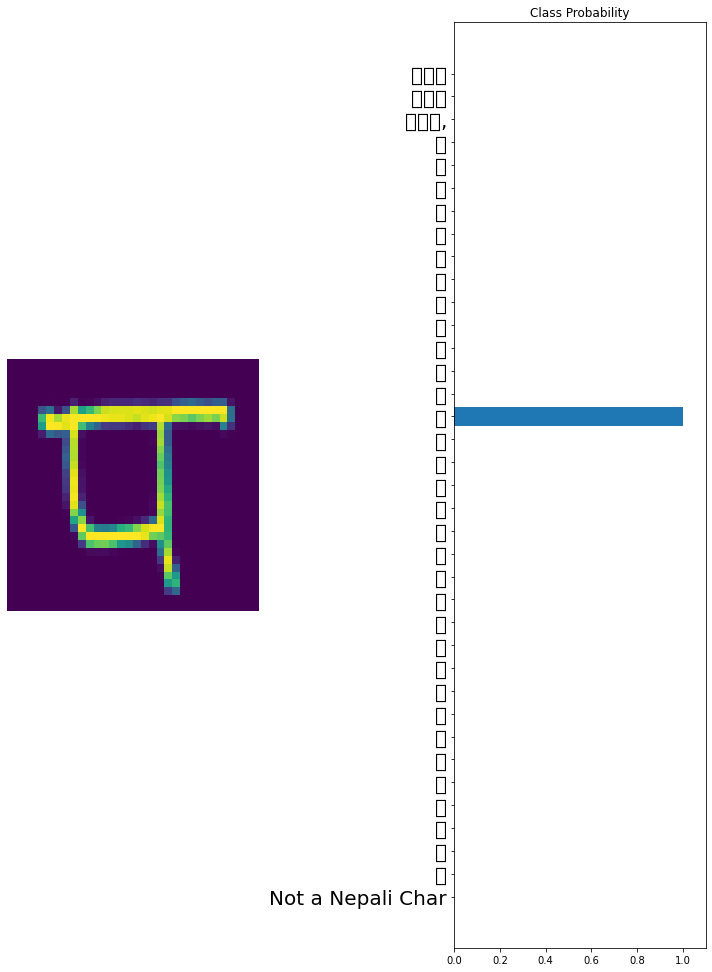

In [ ]:
images,labels = next(iter(test_loader))
img = images[19].view(1,1024)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("The actual Character is", map_labels(labels[19]))
print("Predicted Character =", map_labels(probab.index(max(probab))))
print("The probability of predicted Character is", max(probab))

view_classify(img.view(1,32,32),ps)

### Model Evaluation 

In [ ]:
def evaluate(data_loader):
  correct_count, all_count = 0, 0
  for images, labels in data_loader:
    for i in range(len(labels)):
      img = images[i].view(1,1024)
      with torch.no_grad():
        logps = model(img)
            
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1
  print("Number of Images tested =", all_count)
  print("Model accuracy = ", correct_count/all_count*100)

In [ ]:
print("The results on train set:")
evaluate(train_loader)

The results on train set:
Number of Images tested = 48960
Model accuracy =  100.0


In [ ]:
print("The results on validation set:")
evaluate(valid_loader)

The results on validation set:
Number of Images tested = 12240
Model accuracy =  100.0


In [ ]:
print("The accuracy on test set:")
evaluate(test_loader)

The accuracy on test set:
Number of Images tested = 20001
Model accuracy =  100.0


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/Models/MLP/modelMLPe50lr0.01momen0.5.pt')